<a href="https://colab.research.google.com/github/janpeter19/BPL_CHO_Perfusion/blob/main/Notes_BPL_CHO_Perfusion_cspr_opennloop_fmpy_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BPL_CHO_Perfusion_cspr_openloop script with FMPy

The key library FMPy is installed.

After the installation a small application BPL_CHO_Fedbatch is loaded and run. You can continue with this example if you like.

In [ ]:
!lsb_release -a # Actual VM Ubuntu version used by Google

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


In [ ]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!chmod +x Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
!bash ./Miniconda3-py312_24.3.0-0-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.12/site-packages/')

--2024-05-23 09:17:08--  https://repo.anaconda.com/miniconda/Miniconda3-py312_24.3.0-0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143351488 (137M) [application/octet-stream]
Saving to: ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’

Miniconda3-py312_24 100%[===================>] 136.71M   146MB/s    in 0.9s    

2024-05-23 09:17:09 (146 MB/s) - ‘Miniconda3-py312_24.3.0-0-Linux-x86_64.sh’ saved [143351488/143351488]

PREFIX=/usr/local
Unpacking payload ...

Installing base environment...

Preparing transaction: ...working... done
Executing transaction: ...working... done
installation finished.


In [ ]:
!conda update -n base -c defaults conda --yes

Channels:
 - defaults
 - conda-forge
Platform: linux-64
Solving environment: | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - conda


The following packages will be UPDATED:

  conda                              24.3.0-py312h06a4308_0 --> 24.5.0-py312h06a4308_0 
  openssl                                 3.0.13-h7f8727e_0 --> 3.0.13-h7f8727e_2 




Preparing transaction: | done
Verifying transaction: - \ | done
Executing transaction: - done


In [ ]:
!conda --version
!python --version

conda 24.5.0
Python 3.12.2


In [ ]:
!conda install -c conda-forge fmpy --yes # Install the key package

Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: / - \ | / - \ | / - \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - fmpy


The following packages will be UPDATED:

  libgcc-ng          pkgs/main::libgcc-ng-11.2.0-h1234567_1 --> conda-forge::libgcc-ng-13.2.0-h77fa898_7 
  libgomp              pkgs/main::libgomp-11.2.0-h1234567_1 --> conda-forge::libgomp-13.2.0-h77fa898_7 
  openssl              pkgs/main::openssl-3.0.13-h7f8727e_2 --> conda-forge::openssl-3.3.0-h4ab18f5_2 

The following packages will be SUPERSEDED by a higher-priority channel:

  _libgcc_mutex           pkgs/main::_libgcc_mutex-0.1-main --> conda-forge::_libgcc_mutex-0.1-conda_forge 
  _openmp_mutex          pkgs/main::_openmp_mutex-5.1-1_gnu --> conda-forge::_openmp_mutex-4.5-2_gnu 
  certifi            pkgs/main/linux-64::certifi-2024.2.2-~ --> conda-forge/noarch::certifi-2024.2.2-pyhd8ed1ab_0 
  conda           

In [ ]:
#!conda install matplotlib --yes

In [ ]:
#!conda install scipy --yes

In [ ]:
#!conda install openpyxl --yes

In [ ]:
#!conda install xlrd --yes

# BPL_CHO_Perfusion_cspr_openloop setup


Now specific installation and the run simulations. Start with connecting to Github. Then upload the two files:

* FMU - BPL_CHO_Perfusion_cspr_openloop_linux_om_me.fmu
* Setup-file - BPL_CHO_Perfusion_cspr_openloop_fmpy_explore

In [ ]:
# Filter out DepracationWarnings for 'np.float as alias' is needed - wish I could make filter more narrow
import warnings
warnings.filterwarnings("ignore")

In [ ]:
%%bash
git clone https://github.com/janpeter19/BPL_CHO_Perfusion

Cloning into 'BPL_CHO_Perfusion'...


In [ ]:
%cd BPL_CHO_Perfusion

/content/BPL_CHO_Perfusion/BPL_CHO_Perfusion


# BPL_CHO_Perfusion_cspr_openloop - demo

Author: Jan Peter Axelson




In [ ]:
run -i BPL_CHO_perfusion_cspr_openloop_explore_fmpy.py

Linux - run FMU pre-comiled OpenModelica 1.23.0-dev

Model for bioreactor has been setup. Key commands:
 - par()       - change of parameters and initial values
 - init()      - change initial values only
 - simu()      - simulate and plot
 - newplot()   - make a new plot
 - show()      - show plot from previous simulation
 - disp()      - display parameters and initial values from the last simulation
 - describe()  - describe culture, broth, parameters, variables with values/units

Note that both disp() and describe() takes values from the last simulation
and the command process_diagram() brings up the main configuration

Brief information about a command by help(), eg help(simu)
Key system information is listed with the command system_info()


<Figure size 984.252x787.402 with 0 Axes>

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [25/2.54, 20/2.54]

## 1 About the process model

We can get information about the process and liquid phase by the command describe(). Here is no gas-phase included. This command can also be used to bring up information about a specific variable or parameter. However, you should use describe() after a simulation to get the valued used during the simulation.

No processDiagram.png file in the FMU, but try the file on disk.


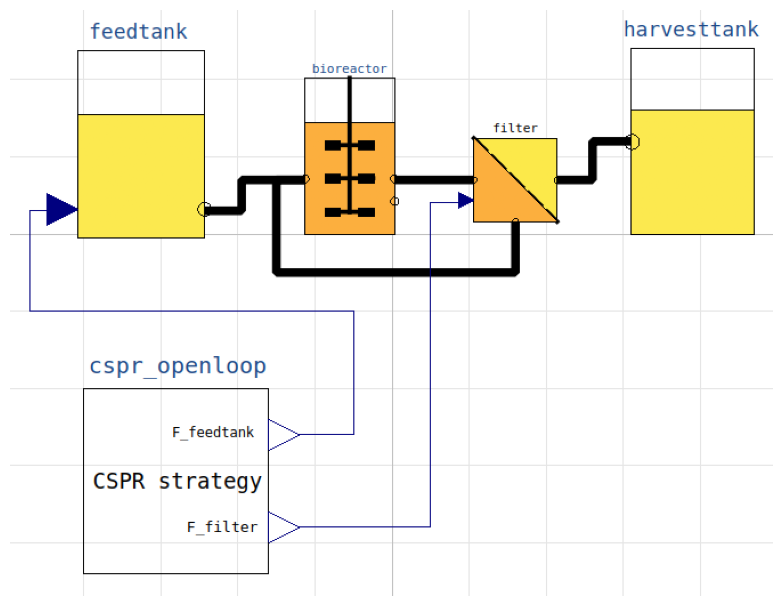

In [ ]:
process_diagram()

In [ ]:
describe('culture'); print(); #describe('liquidphase')                                  # Pump schedule parameter


Reactor culture CHO-MAb - cell line HB-58 American Culture Collection ATCC



The molecular weight of the recombinant protein (MAb) is somewhat arbitrarly chosen and the value not used in the simulations.

In [ ]:
describe('MSL')

MSL: 3.2.3 - used components: RealInput, RealOutput, CombiTimeTable, Types


In [ ]:
newplot('Perfusion cultivation', plotType='Extended')

par(samplePeriod=1); par(F1=0.0020)              # General parameters
par(mu_ref=0.04); simu()                         # First simulation (solid)
par(mu_ref=1); simu()                            # Second simulation (dashed)

In [ ]:
model_get('CSPR')

We see here the shorter settling time for cell conc Xv when the slower exponential increase of perfusion rate is used, compared to an abrupt change.

In [ ]:
newplot('Perfusion cultivation', plotType='Extended')
par(samplePeriod=1); par(F1=0.0080) par(mu_ref=0.04); simu() par(mu_ref=1); simu()
# General parameters
# First simulation (solid)
# Second simulation (dashed)

We see that a somewhat smaller change in perfusion rate make the differnce in settling time of Xv for the two strategies to almost disappear.

In [ ]:
newplot('Perfusion cultivation', plotType='Extended')
simu(600)
simu(400,'cont')

In [ ]:
system_info()


System information
 -OS: Linux
 -Python: 3.10.12
 -Scipy: not installed in the notebook
 -FMPy: 0.3.20
 -FMU by: OpenModelica Compiler OpenModelica 1.23.0~dev.beta.1-1-g379f714
 -FMI: 2.0
 -Type: ME
 -Name: BPL_CHO.Perfusion_cspr_openloop
 -Generated: 2024-05-20T19:01:47Z
 -MSL: 3.2.3
 -Description: Bioprocess Library version 2.2.0
 -Interaction: FMU-explore for FMPy version 1.0.0
